# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# All necessary libraries like pandas, numpy, matplotlib, and seaborn are correctly imported.
# Warnings are suppressed using warnings.filterwarnings('ignore'), which is helpful for a cleaner output.

# **Dataset Loading and Exploration**

In [2]:
data = pd.read_csv("/kaggle/input/new-york-dataset/new_york_listings_2024.csv", encoding_errors='ignore')
data.head(5)

# The dataset is loaded using pd.read_csv()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30,3,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2,6,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30,156,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30,11,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [3]:
data.shape

(20758, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


# **Data Cleaning**

**Checking for nulls**

In [6]:
data.isnull().sum()

# The dataset appears clean, with no null values in key columns.

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

**Checking for duplicates**

In [7]:
data.duplicated().sum()

# The dataset appears clean, with no duplicated values in key columns.

0

**Changing types of columns for easier evaluation**

In [8]:
data['id']=data['id'].astype(object)
data['host_id']=data['host_id'].astype(object)

#type casting

In [9]:
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

**Handling outliers**

In [10]:
data['price']

0         55.0
1        144.0
2        187.0
3        120.0
4         85.0
         ...  
20753     45.0
20754    105.0
20755    299.0
20756    115.0
20757    102.0
Name: price, Length: 20758, dtype: float64

<Axes: xlabel='price'>

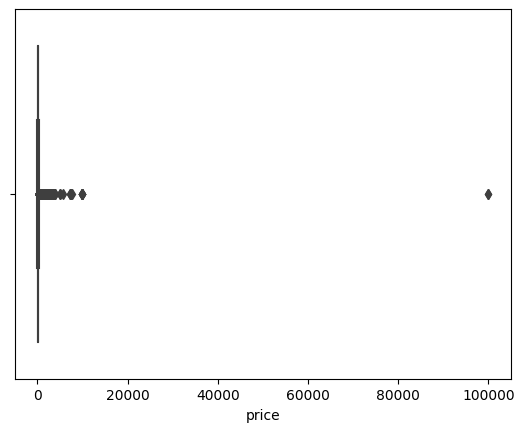

In [11]:
sns.boxplot(data=data, x='price')

# According to box plot there are few outliers

<Axes: xlabel='price'>

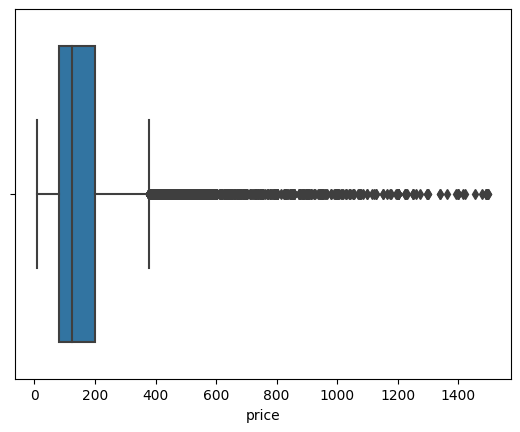

In [12]:
df=data[data['price']<1500]
sns.boxplot(data=df, x='price')

# Eliminating outliers
# Created a new dataframe df that will be used onwards

# **Feature Engineering**

In [13]:
df['price_per_bed']=df['price']/df['beds']

#Adding a column thats tell price of each bed with given listed price

In [14]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price_per_bed
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30,3,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified,55.0
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1,144.0
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2,6,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1,93.5
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30,156,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1,120.0
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30,11,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1,85.0


# **Data Analysis**

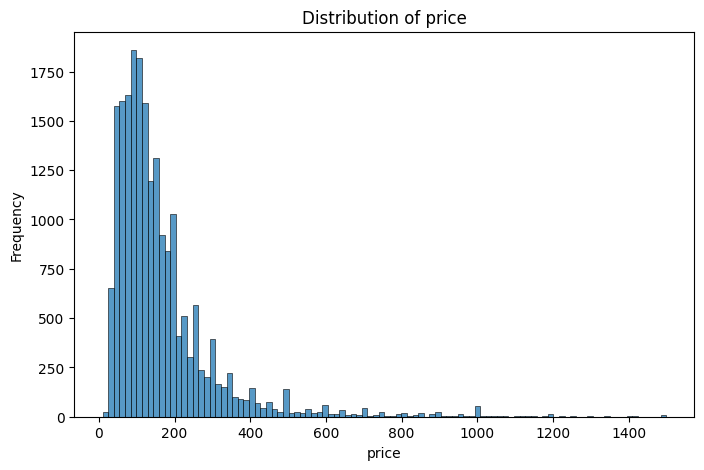

In [15]:
plt.figure(figsize=(8,5))
plt.title('Distribution of price')
plt.ylabel("Frequency")
sns.histplot(data=df, x='price',bins=100)
plt.show()

# Histogram of Distribution of price
# Many rooms listed at around the 50 to 200 mark

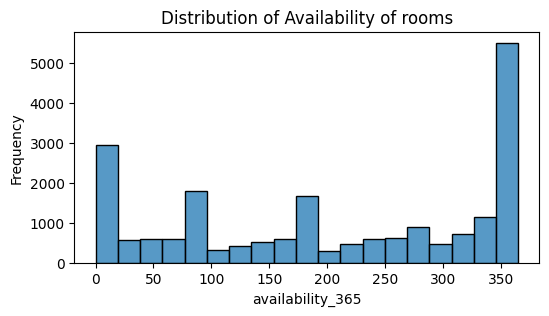

In [16]:
plt.figure(figsize=(6,3))
plt.title('Distribution of Availability of rooms')
plt.ylabel("Frequency")
sns.histplot(data=df, x='availability_365')
plt.show()

# Histogram of Availability of rooms
# Many rooms avaiable during the start and end of the year

In [17]:
df.groupby(by='neighbourhood_group')['price'].mean()

# Average of price per neighbourhood group

neighbourhood_group
Bronx            107.990506
Brooklyn         155.079320
Manhattan        204.203739
Queens           121.652290
Staten Island    118.780069
Name: price, dtype: float64

In [18]:
df.groupby(by='neighbourhood_group')['price_per_bed'].mean()

# Average of price_per_bed per neighbourhood group

neighbourhood_group
Bronx             74.713639
Brooklyn          99.772087
Manhattan        138.708581
Queens            76.330706
Staten Island     67.728101
Name: price_per_bed, dtype: float64

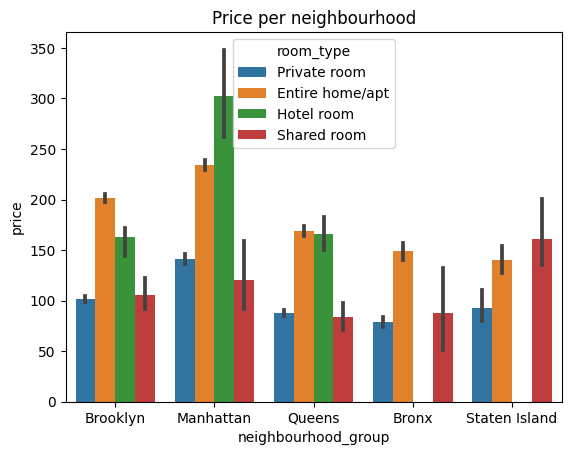

In [19]:
plt.title('Price per neighbourhood')
sns.barplot(data=df, x='neighbourhood_group',y='price',hue='room_type')
plt.show()

# Lineplot of price per neighbourhood
# Many rooms avaiable during the start and end of the year

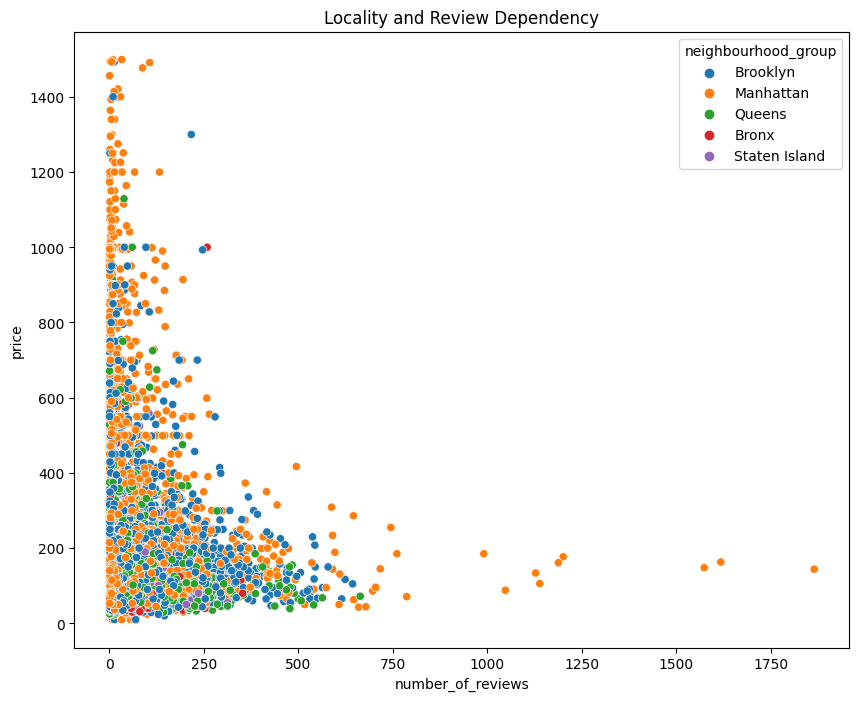

In [20]:
plt.figure(figsize=(10,8))
plt.title('Locality and Review Dependency')
sns.scatterplot(data=df,x='number_of_reviews',y='price', hue='neighbourhood_group')
plt.show()

# Scatter plt of Locality and Review

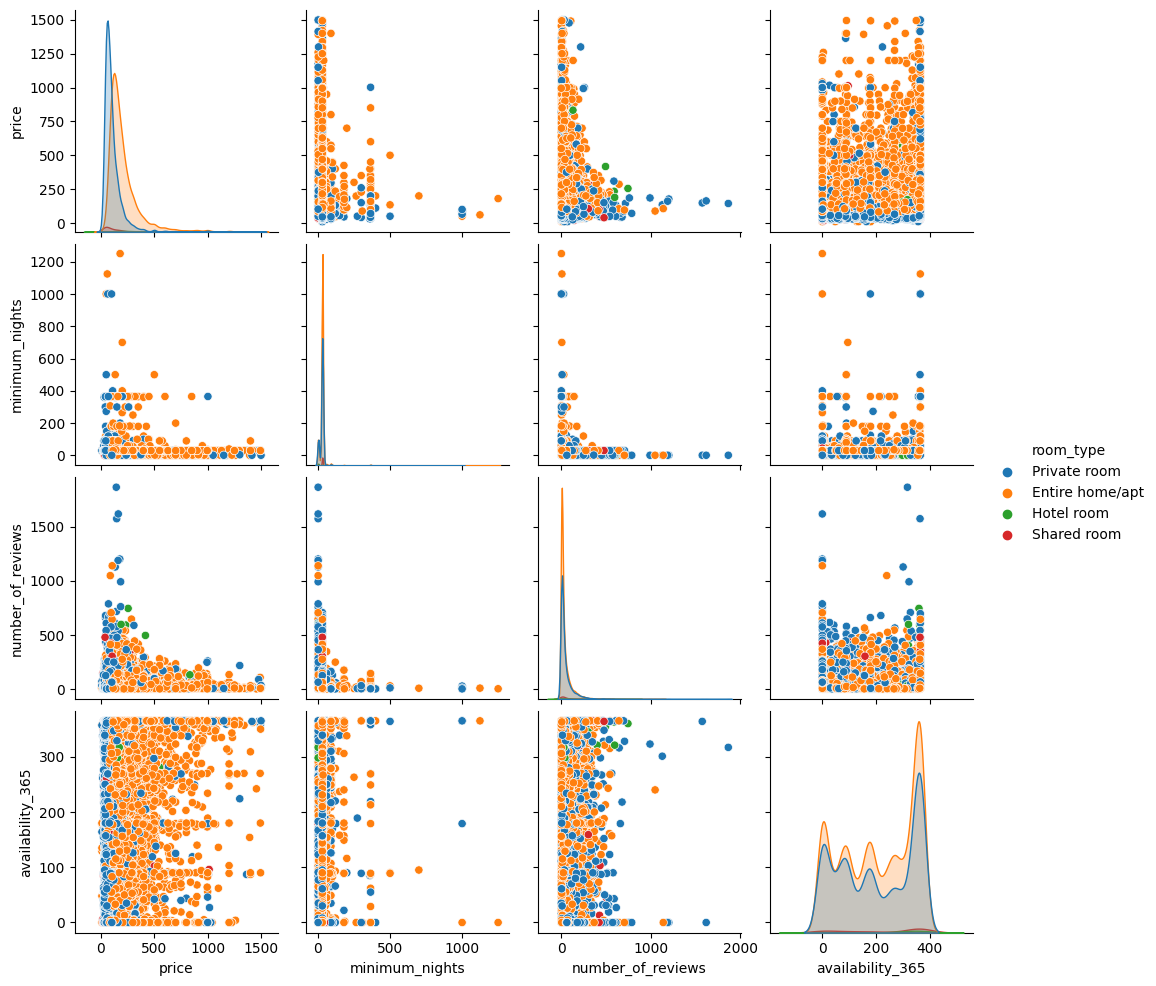

In [21]:
sns.pairplot(data=df, vars=['price','minimum_nights','number_of_reviews','availability_365'],hue='room_type')

# Pairplot between different columns

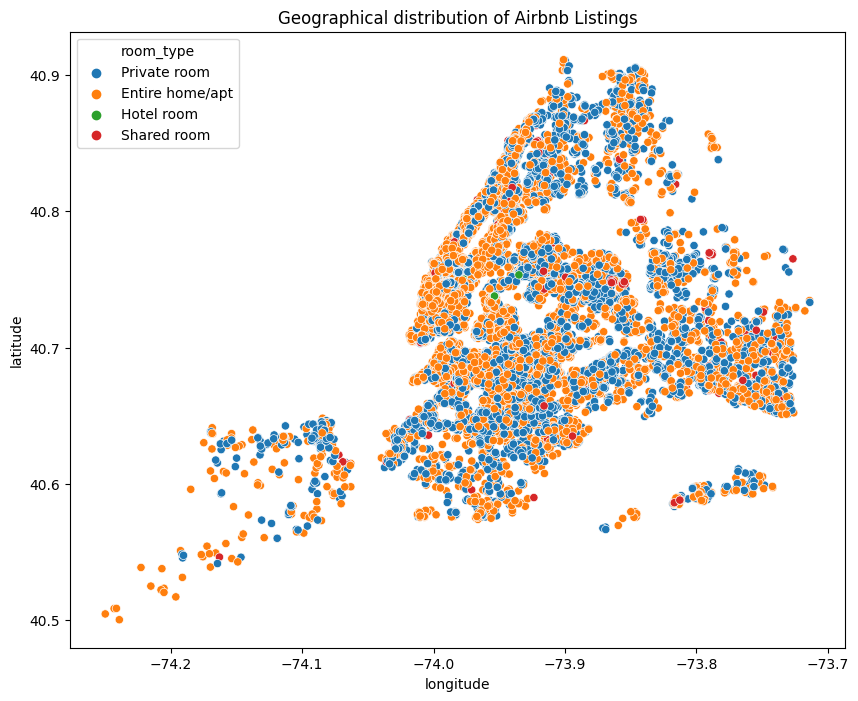

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='longitude',y='latitude',hue='room_type')
plt.title('Geographical distribution of Airbnb Listings')
plt.show()

# Scatter plot for Geographical Distribution of Airbnb Lisings
# Visual representation of Room types based on longitude and latitude

In [23]:
corr=df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','beds']].corr()
corr

# Correlation matrix for columns

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,beds
latitude,1.000000,0.047303,0.012823,0.004552,-0.048140,-0.041708,-0.006199,-0.071642
longitude,0.047303,1.000000,-0.193757,0.023933,0.004698,0.041688,0.063475,0.041725
price,0.012823,-0.193757,1.000000,-0.044794,-0.043446,-0.012616,0.047798,0.415830
minimum_nights,0.004552,0.023933,-0.044794,1.000000,-0.059236,-0.122609,0.035494,-0.025927
number_of_reviews,-0.048140,0.004698,-0.043446,-0.059236,1.000000,0.630846,-0.049949,0.039734
reviews_per_month,-0.041708,0.041688,-0.012616,-0.122609,0.630846,1.000000,-0.040169,0.053238
availability_365,-0.006199,0.063475,0.047798,0.035494,-0.049949,-0.040169,1.000000,0.065595
beds,-0.071642,0.041725,0.415830,-0.025927,0.039734,0.053238,0.065595,1.000000


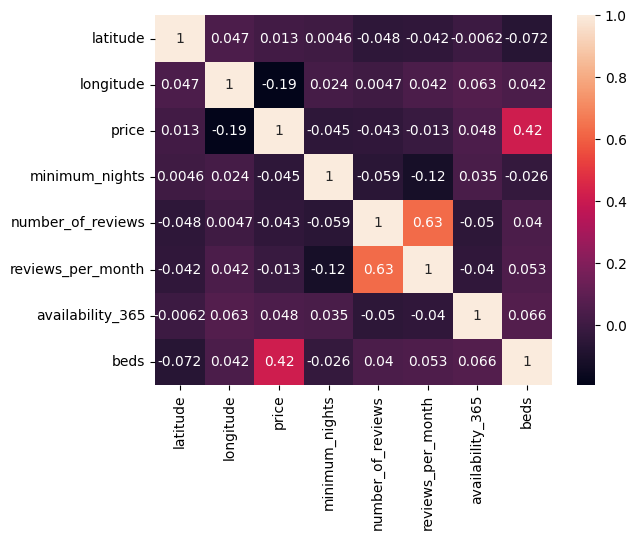

<Figure size 800x600 with 0 Axes>

In [24]:
sns.heatmap(data=corr,annot=True)
plt.figure(figsize=(8,6))
plt.show()

# Heatmap for correlation matrix
# Size is positively correlated with Price.
# Number of Bedrooms and Bathrooms also show positive but weaker correlation with Price.